In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import sys, json, os
sys.path.append('..')
from project.recoil import Nuclear as Nr
from project.recoil import get_vdf_ert
import pickle

In [2]:
MW_dict = pickle.load(open('../Output/MW_dict.pkl','rb'))

In [4]:
mwd = MW_dict['vdf_RCfit']
nr = Nr('Xe', mwd['vE'], mwd['vdfE_50'], 544., 220., 0.4)
E = nr.E

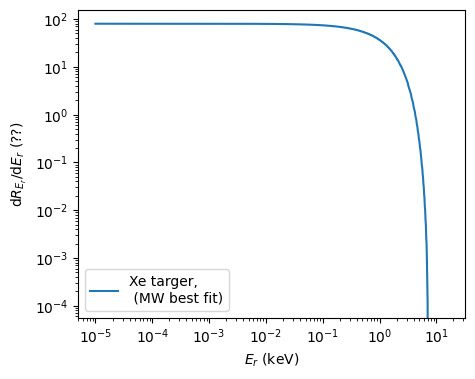

In [143]:
fig, ax = plt.subplots(figsize = (5,4))
ax.plot(E, nr.diffRate(10., 1e-40, E), label = 'Xe targer,\n (MW best fit)')
ax.set_xscale('log')
ax.set_yscale('log')

ax.legend()
ax.set_xlabel('$E_r$ (keV)')
ax.set_ylabel(r'${\mathrm{d}R_{E_r}}/{\mathrm{d} E_r}$ (??)');

plt.savefig('../Output/figures/nuclear/diffRate.png',bbox_inches = 'tight', dpi = 300)

# $\Delta m_\mathrm{stat}$

In [393]:
from tqdm.notebook import tqdm
Ngrid = 40
Mdm = np.logspace(0, 1, Ngrid)
# Sdm = np.concatenate((np.linspace(-52,-47,int(Ngrid/2)), np.linspace(-47,-46,int(Ngrid/2))))
Sdm = np.linspace(-48, -44, Ngrid)
Mdm_grid = np.zeros([Ngrid, Ngrid])
Sdm_grid = np.zeros([Ngrid, Ngrid])
Ntot_grid = np.zeros([Ngrid, Ngrid])
for i, mdm in tqdm(enumerate(Mdm)):
    for j, sdm in enumerate(Sdm):
        Ntot_grid[i,j] = nr.totN(mdm, 10**sdm, E, ω = 1*365000, Emin = 0.1)
        Mdm_grid[i,j] = mdm
        Sdm_grid[i,j] = sdm

0it [00:00, ?it/s]

In [195]:
mdm_dict = {'sys': {'Mdm': Mdm,
                    'Sdm': Sdm,
                    'grid': [Sdm_grid, Mdm_grid],
                    'Ntot_grid': Ntot_grid}}

# pickle.dump(mdm_dict, open('../Output/mdm_dict.pkl','wb'))

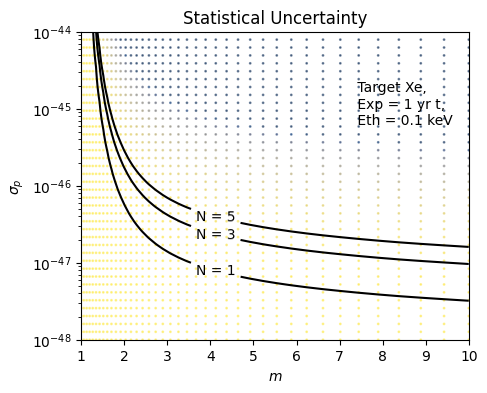

In [434]:
fig, ax1 = plt.subplots(1, 1, figsize = (5,4))

Nsys = [3 - np.sqrt(3), 3, 3 + np.sqrt(3)]
Nsys = [1, 3, 5]

for n in Nsys:
    cn = ax1.contour(Mdm_grid, 10**Sdm_grid, Ntot_grid, levels = [n], colors = 'k')
    line = cn.collections[0].get_paths()[0]
    x, y = line.vertices[:, 0], line.vertices[:, 1]
    lines.append([x,y])
    ax1.clabel(cn, fmt='N = %.i', inline = True, rightside_up = True)

ax1.scatter(Mdm_grid, 10**Sdm_grid, c = Ntot_grid, cmap = 'cividis_r', vmin = 0, vmax = 100, s = 1, alpha = 0.5, zorder = 0)

ax1.set_title('Statistical Uncertainty')
ax1.set_ylabel('$\sigma_p$')
ax1.set_xlabel('$m$');
# ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.text(0.7, 0.7, ' Target Xe, \n Exp = 1 yr t, \n Eth = 0.1 keV', transform = ax1.transAxes, zorder = 2);

# plt.savefig('../Output/figures/nuclear/Exclusion_plot_stat_zoom.png',bbox_inches = 'tight', dpi = 300)

[0.14541294 0.22556803 0.35581607 0.53834634 0.69165987 0.73069532
 0.73672068 0.74766956 0.75603245 0.76235945 0.77317359 0.7821646
 0.79163473 0.7980463  0.80650818 0.81436798 0.82189879 0.82891956
 0.83577435 0.843533   0.84978693 0.85755497 0.86095876 0.86739598
 0.87387305 0.87859008 0.88264696 0.88815126 0.89299276 0.89665195
 0.90052507 0.9055038  0.9075763  0.9096794  0.9143113  0.91809824
 0.92102397 0.9238563  0.92571906 0.92789711 0.93113899 0.93340989
 0.93510314 0.93724654 0.93960353 0.94136849 0.94308424 0.94528417
 0.94720829 0.94831593 0.94924236 0.95049824 0.95196856 0.9532472
 0.95423992 0.95504572 0.9555951  0.95616372 0.95704375 0.95837279
 0.95968518 0.96081861 0.96180429 0.96273644 0.96366984 0.96462827
 0.96562379 0.96664116 0.96749981 0.96799405 0.96823282 0.96838195
 0.96867559 0.96940029 0.97056948 0.97199939 0.97339148 0.97430349
 0.97438729 0.97389531 0.97326115 0.97288523 0.97316392 0.97408658
 0.97523855 0.97650442 0.97780392 0.97905369 0.97999165 0.980017

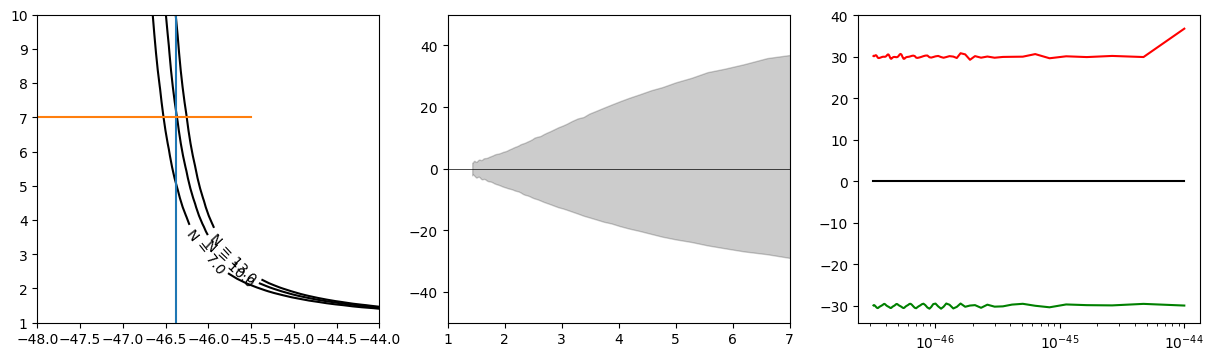

In [500]:
import warnings, matplotlib
warnings.filterwarnings("ignore", category=matplotlib.MatplotlibDeprecationWarning)

grid = [Sdm, Mdm]
# Nsys = [3 - np.sqrt(3), 3, 3 + np.sqrt(3)]
Nsys = [7, 10, 13]
lines = []

fig,axs = plt.subplots(1,3,figsize = (15,4))
ax1,ax2,ax3 = axs

for n in Nsys:
    cn = ax1.contour(Sdm_grid, Mdm_grid, Ntot_grid, levels = [n], colors = 'k')
    line = cn.collections[0].get_paths()[0]
    x, y = line.vertices[:, 0], line.vertices[:, 1]
    lines.append([x,y])
    ax1.clabel(cn, fmt='N = %.1f', inline=True)

l1, l3, l5 = lines
x1, y1 = l1
x3, y3 = l3
x5, y5 = l5

y1 = sp.interpolate.interp1d(x1, y1, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')
y3 = sp.interpolate.interp1d(x3, y3, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')
y5 = sp.interpolate.interp1d(x5, y5, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')

x = np.linspace(np.min(x3), np.max(x3), 100)

print (y3(x)/y5(x))

m = y3(x)
cup = (y1(x) - y3(x))/y3(x)*1e2
cdn = (y5(x) - y3(x))/y3(x)*1e2
# ax2.plot(m, cup, c = 'k', label = 'm(1) - m(3)')
# ax2.plot(m, cdn, c = 'k', label = 'm(5) - m(3)')
ax2.fill_between(m, cup, cdn, color = 'k', alpha = 0.2)
ax2.plot([1,10],[0,0], c = 'k', lw = 0.5)
ax2.set_xlim([1,7])
# ax2.legend()
ax2.set_ylim(-50, 50)
ax1.plot([-46.38]*2, [1,10])
ax1.plot([-48,-45.5], [7]*2)

l1, l3, l5 = lines
x1, y1 = l1
x3, y3 = l3
x5, y5 = l5

x1 = sp.interpolate.interp1d(y1, 10**x1, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')
x3 = sp.interpolate.interp1d(y3, 10**x3, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')
x5 = sp.interpolate.interp1d(y5, 10**x5, kind = 'cubic', bounds_error = False, fill_value = 'extrapolate')

y = np.linspace(np.min(y3), np.max(y3), 100)
ax3.plot(x3(y), (x1(y) - x3(y))/x3(y) * 100, c = 'g')
ax3.plot(x3(y), (x3(y) - x3(y))/x3(y) * 100, c = 'k')
ax3.plot(x3(y), (x5(y) - x3(y))/x3(y) * 100, c = 'r')
ax3.set_xscale('log')


In [345]:
(y3(-46) - y1(-46))/y3(-46) * 100

18.943510835214553

# $\Delta m_\mathrm{MW}$

In [ ]:
from tqdm.notebook import tqdm
Ngrid = 50
Mdm = np.linspace(1,10,Ngrid)
Sdm = np.concatenate((np.linspace(-52,-47,int(Ngrid/2)), np.linspace(-47,-46,int(Ngrid/2))))
Sdm = np.linspace(-46,-52,Ngrid)
Mdm_grid, Sdm_grid = np.meshgrid(Mdm, Sdm)
Ntot_grid = np.zeros([Ngrid,Ngrid])
for i, mdm in tqdm(enumerate(Mdm)):
    for j, sdm in enumerate(Sdm):
        Ntot_grid[i,j] = nr.totN(mdm, 10**sdm, E, ω = 10*365000, Emin = 0.1)

In [ ]:
from multiprocessing import Pool, cpu_count

Ngrid = 50,
Mdm = np.l

def process_data(*args):
    # Find Ntot given vE, vdfE, vesc, vcirc, rhosun
    nr = Nr(*args)
    
    return processed_data

if __name__ == '__main__':
    # Define your data
    data = [...]

    # Calculate the number of CPU cores available
    num_cores = cpu_count()

    # Create a multiprocessing Pool with the desired number of processes
    with Pool(processes=num_cores) as pool:
        # Distribute the data across the pool of processes
        processed_results = pool.map(process_data, data)

    # The processed results will be returned as a list
    print(processed_results)
